In [25]:
import numpy as np
from Bandits2 import Bandits
import matplotlib.pyplot as plt

In [26]:
A = Bandits(K=5, d=3, C=-1)
B = Bandits(K=5, d=3, C=-1, p=1)
C = Bandits(K=5, d=3, C=-1, p=0.1)

### Effect of $\lambda$

In [33]:
def la_effect(self, max_T=500, steps=200, delta=0.05, noisef=0.1, repeats=20):
    np.random.seed(0)
    noise = np.mean(self.rewards) * noisef
    # Independent variable (la)
    x = np.linspace(0, 0.3, steps+1)[1:]

    # Dependent variable (Total regret)
    y = np.zeros((repeats, steps))

    # Run algorithms

    for r in range(steps):
        for t in range(repeats):
            y[t, r] += (np.array(self.LinUCB(x[r], delta, noise, T=max_T, steps=steps)[2]))

    
    err = np.std(y, axis=0, ddof=1) / np.sqrt(repeats)

    # Plot
    plt.figure()
    plt.errorbar(x, np.sum(y, axis=0)/repeats, yerr=err,
                  linestyle='-', marker='x', markersize=2)

    plt.grid()
    plt.xlabel("λ")
    plt.ylabel("Total Regret")
    plt.title("Effect of different λ on the total regret")
    plt.show()


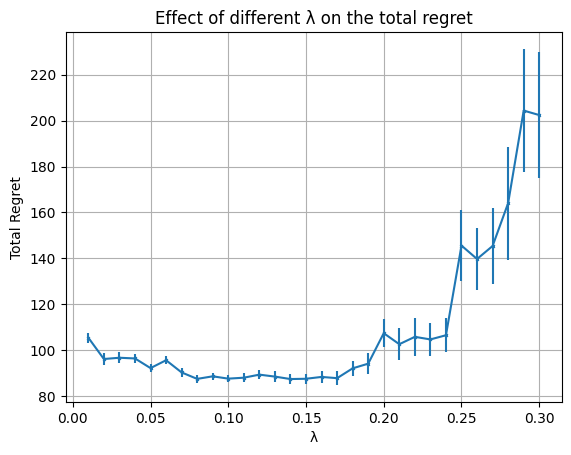

In [34]:
la_effect(A, steps=30)

### Noise

In [62]:
def noise_effect(self, max_T=500, steps=200, la=0.16, delta=0.05, repeats=20):
    np.random.seed(0)
    # Independent variable (la)
    x = np.linspace(0, 1, steps) * np.mean(self.rewards) 

    # Dependent variable (Total regret)
    y = np.zeros((repeats, steps))

    # Run algorithms

    for r in range(steps):
        for t in range(repeats):
            y[t, r] += (np.array(self.LinUCB(la, delta, x[r], T=max_T, steps=steps)[2]))

    
    err = np.std(y, axis=0, ddof=1) / np.sqrt(repeats)

    # Plot
    plt.figure()
    plt.errorbar(np.linspace(0, 1, steps), np.sum(y, axis=0)/repeats, yerr=err,
                  linestyle='-', marker='x', markersize=2)

    plt.grid()
    plt.xlabel("Noise")
    plt.ylabel("Total Regret")
    plt.title("Effect of noise level on the total regret")
    plt.show()


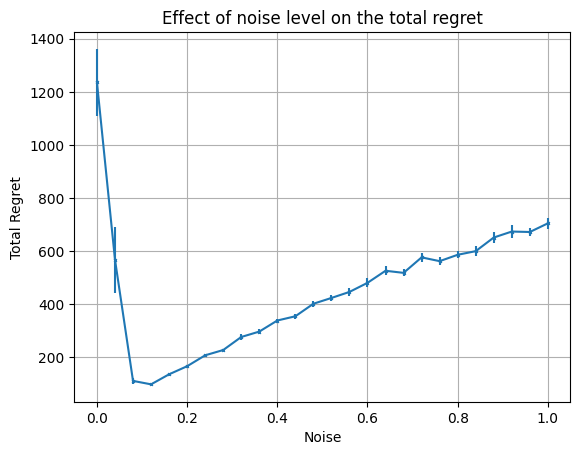

In [63]:
noise_effect(A, max_T=500, steps=26)

### Delta

In [56]:
def delta_effect(self, max_T=500, steps=200, la=0.16, noisef=0.1, repeats=20):
    np.random.seed(0)
    noise = np.mean(self.rewards) * noisef
    # Independent variable (la)
    x = np.linspace(0, 0.6, steps+1)[1:]

    # Dependent variable (Total regret)
    y = np.zeros((repeats, steps))

    # Run algorithms
    err = np.zeros((20, steps))
    for k in range(20):
        for r in range(steps):
            for t in range(repeats):
                y[t, r] += (np.array(self.LinUCB(la, x[r], noise, T=max_T, steps=steps)[2]))
        

        err[k] = np.std(y, axis=0, ddof=1) / np.sqrt(repeats)
    err_err = np.std(err, axis=0, ddof=1) / np.sqrt(20)

    # Plot
    plt.figure()
    plt.errorbar(x, np.sum(err, axis=0)/repeats, yerr=err_err,
                  linestyle='-', marker='x', markersize=2)

    plt.grid()
    plt.xlabel("δ")
    plt.ylabel("Standard Error of the Total Regret")
    plt.title("Effect of different δ on the SE of the total regret")
    plt.show()


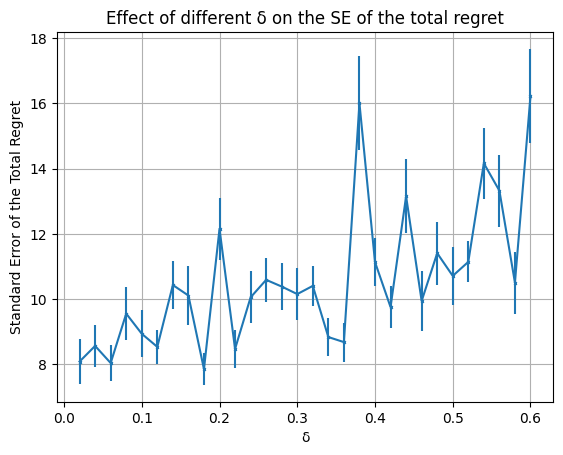

In [57]:
delta_effect(A, steps=30)

In [58]:
def delta_effect2(self, max_T=500, steps=200, la=0.16, noisef=0.1, repeats=20):
    np.random.seed(0)
    noise = np.mean(self.rewards) * noisef
    # Independent variable (la)
    x = np.linspace(0, 0.6, steps+1)[1:]

    # Dependent variable (Total regret)
    y = np.zeros((repeats, steps))

    # Run algorithms
    for r in range(steps):
        for t in range(repeats):
            y[t, r] += (np.array(self.LinUCB(la, x[r], noise, T=max_T, steps=steps)[2]))
    

    err = np.std(y, axis=0, ddof=1) / np.sqrt(repeats)

    # Plot
    plt.figure()
    plt.errorbar(x, np.sum(y, axis=0)/repeats, yerr=err,
                  linestyle='-', marker='x', markersize=2)

    plt.grid()
    plt.xlabel("δ")
    plt.ylabel("Total Regret")
    plt.title("Effect of different δ on the total regret")
    plt.show()


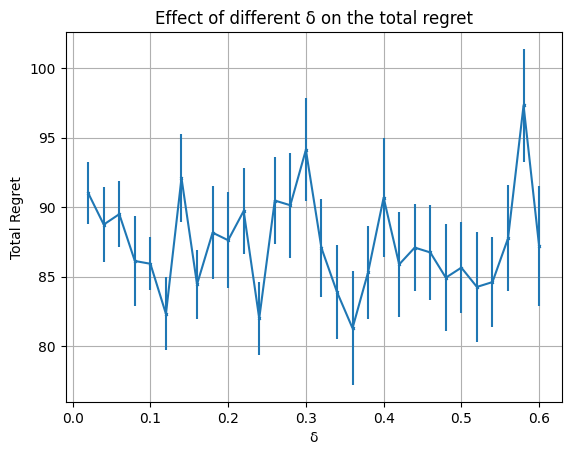

In [59]:
delta_effect2(A, steps=30)